# K-Nearest Neighbor (KNN) Algorithm in Machine Learning

The K-Nearest Neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used for both classification and regression tasks. It is a non-parametric algorithm, which means that it does not make any assumptions about the underlying data distribution. It is a lazy learning algorithm because it does not have a specialized training phase. It uses all the data for training while classification.

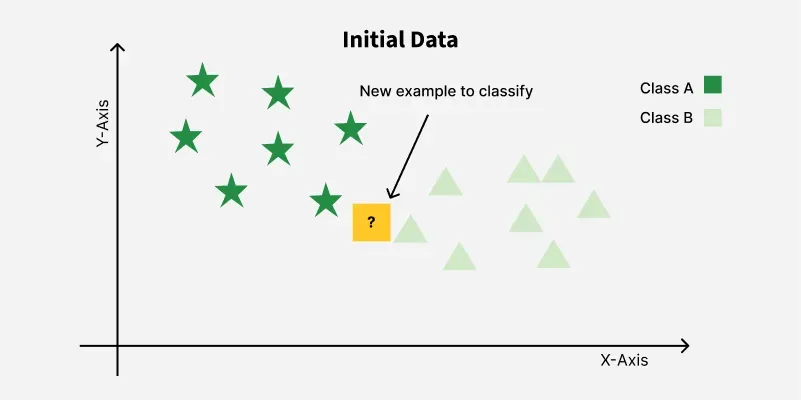

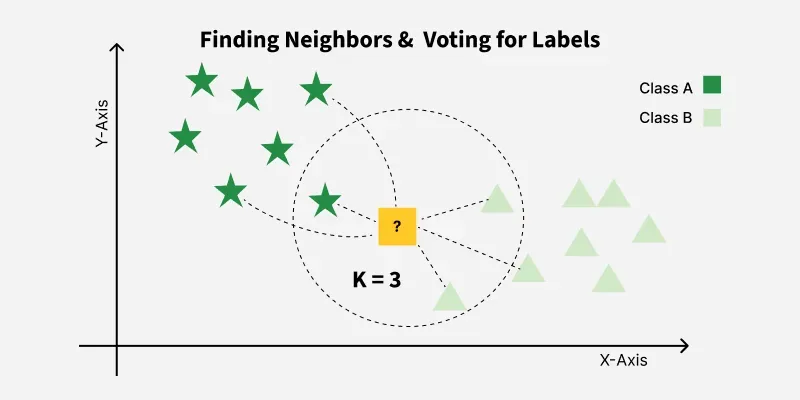



## How KNN Works

The KNN algorithm works by finding the K most similar data points in the training data to a new data point, and then predicting the label of the new data point based on the labels of its K-nearest neighbors.

### Steps of the KNN Algorithm
1. **Load the data:** Load the training data and the test data.
2. **Choose the value of K:** Choose the number of nearest neighbors to consider.
3. **For each data point in the test data:**
    * a. **Calculate the distance:** Calculate the distance between the test data point and all the training data points. The most common distance metric is Euclidean distance, but other metrics such as Manhattan distance and Minkowski distance can also be used.
    * b. **Find the K-nearest neighbors:** Find the K training data points that are closest to the test data point.
    *  c. **Predict the label:**
        - For classification tasks, predict the label of the test data point to be the most common label among its K-nearest neighbors.
        - For regression tasks, predict the label of the test data point to be the average of the labels of its K-nearest neighbors.

### How to Choose the Value of K

The value of K is a hyperparameter that you need to choose. A small value of K will make the model more sensitive to noise, while a large value of K will make the model more biased. A common way to choose the value of K is to use cross-validation. The value of K is usually an odd number to avoid ties in classification.

K-Nearest Neighbors is also called as a lazy learner algorithm because it does not learn from the training set immediately instead it stores the entire dataset and performs computations only at the time of classification.

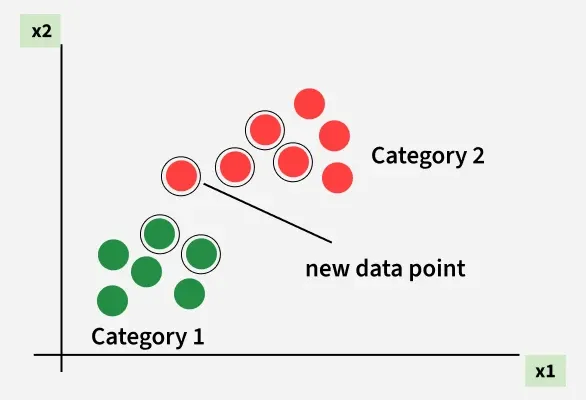


## What is 'K' in K Nearest Neighbour?

In KNN, 'K' refers to the number of nearest neighbors that the algorithm will consider when making a prediction about the class or value of a new data point. The choice of 'K' can significantly impact the performance of the KNN algorithm.

#### How to choose the value of k for KNN Algorithm?

Choosing the optimal value of 'K' is crucial for the performance of the KNN algorithm. Here are some common methods to select the value of 'K':
1. **Cross-Validation:** Use techniques like k-fold cross-validation to evaluate the performance of the KNN algorithm for different values of 'K' and select the one that yields the best results.
2. **Elbow Method:** Plot the error rate for different values of 'K' and look for an "elbow" point where the error rate starts to decrease more slowly.
3. **Domain Knowledge:** Use prior knowledge about the data to choose a reasonable value for 'K'.
4. **Odd Numbers:** For classification tasks, it is often recommended to choose an odd value for 'K' to avoid ties when voting for the class labels.

#### Statistical Methods for Selecting k

1. **Grid Search:** Systematically explore a range of 'K' values and evaluate the model's performance using a validation set.
2. **Bayesian Optimization:** Use probabilistic models to find the optimal 'K' by maximizing a performance metric.
3. **Information Criteria:** Use criteria like AIC or BIC to select 'K' based on model complexity and goodness of fit.

### Distance Metrics Used in KNN Algorithm

KNN uses various distance metrics to measure the similarity between data points. The choice of distance metric can affect the performance of the algorithm. Some common distance metrics used in KNN include:
1. **Euclidean Distance:** The most common distance metric, calculated as the square root of the sum of squared differences between corresponding features of two data points.
2. **Manhattan Distance:** The sum of the absolute differences between corresponding features of two data points.
3. **Minkowski Distance:** A generalization of both Euclidean and Manhattan distances, defined by a parameter 'p'.
4. **Hamming Distance:** Used for categorical data, it counts the number of positions at which the corresponding elements are different.
5. **Cosine Similarity:** Measures the cosine of the angle between two non-zero vectors, often used in text classification tasks.

## Working of KNN algorithm

The KNN algorithm works by finding the K most similar data points in the training data to a new data point, and then predicting the label of the new data point based on the labels of its K-nearest neighbors.

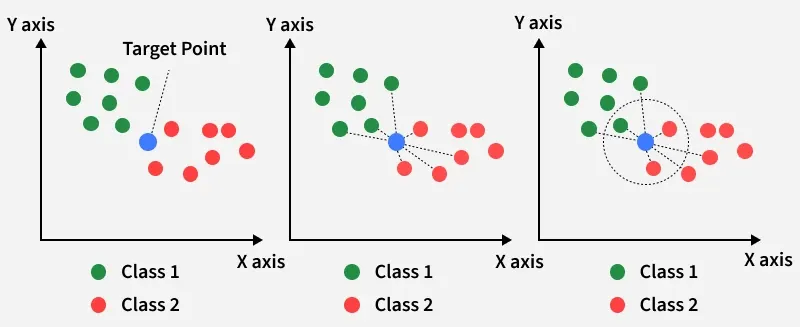

### Steps of the KNN Algorithm

Step 1: Selecting the optimal value of K

Step 2: Calculating distance

Step 3: Finding Nearest Neighbors

Step 4: Voting for Labels


## Implementing KNN Algorithm Using Scikit-Learn

### Example 1: Linear KNN

Accuracy: 0.80


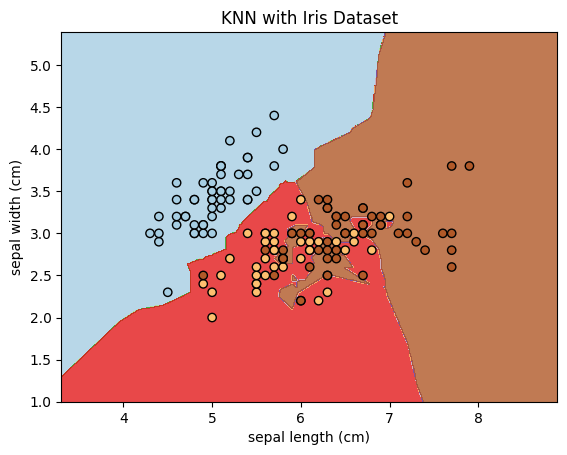

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the data
iris = load_iris()
X = iris.data[:, :2]
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("KNN with Iris Dataset")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

plot_decision_boundary(X, y, knn)

### Example 2: Non-linear KNN

Accuracy: 1.00


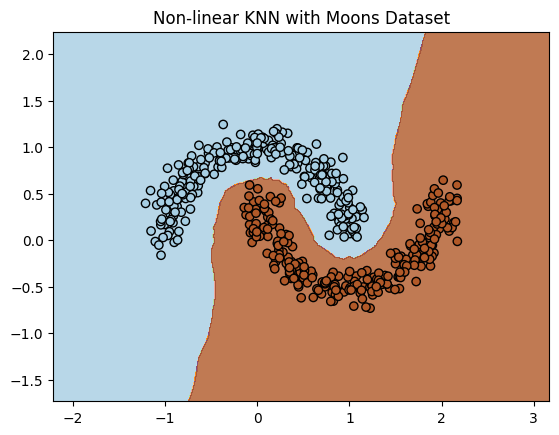

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create and split the dataset
X, y = make_moons(n_samples=500, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Non-linear KNN with Moons Dataset")
    plt.show()

plot_decision_boundary(X, y, knn)

## Advantages of KNN

* Simple to understand and implement.
* No assumptions about the data distribution.
* Can be used for both classification and regression tasks.
* It is a lazy learning algorithm, so it is fast to train.

## Disadvantages of KNN

* Can be slow for large datasets because it needs to store all the training data.
* Sensitive to the choice of K.
* Sensitive to the scale of the data and irrelevant features.

# Understanding Decision Boundaries in K-Nearest 

A decision boundary is a line or surface that divides different groups in a classification task. It shows which areas belong to which class based on what the model decides. K-Nearest Neighbours (KNN) algorithm operates on the principle that similar data points exist in close proximity within a feature space.

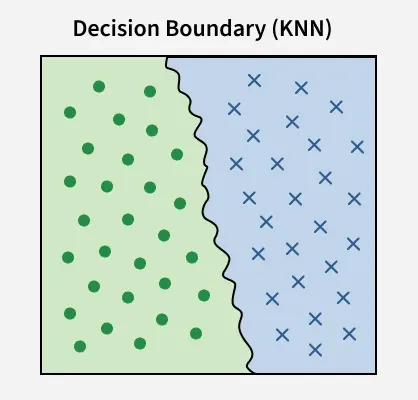

The shape of this boundary depends on:

* The value of K (how many neighbours are considered).
* How the data points are spread out in space.

### Using Voronoi Diagrams to Visualize

Voronoi diagrams are a way to visualize how KNN creates decision boundaries. Each point in the space is assigned to the nearest training data point, creating regions that represent different classes. The boundaries between these regions are the decision boundaries.

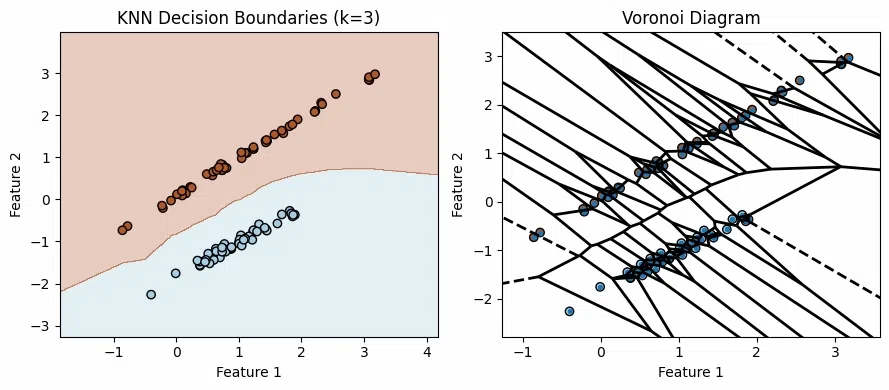

### Relationship Between KNN Decision Boundaries and Voronoi Diagrams

In two-dimensional space the decision boundaries of KNN can be visualized as Voronoi diagrams. Here’s how:

* KNN Boundaries: The decision boundary for KNN is determined by regions where the classification changes based on the nearest neighbors. K approaches infinity, these boundaries approach the Voronoi diagram boundaries.
* Voronoi Diagram as a Special Case: When k = 1 KNN’s decision boundaries directly correspond to the Voronoi diagram of the training points. Each region in the Voronoi diagram represents the area where the nearest training point is closest.

### How KNN Defines Decision Boundaries

KNN defines decision boundaries based on the majority class of the K nearest neighbors. The boundaries are influenced by: 

* Value of K: A smaller K leads to more complex boundaries that closely follow the training data, while a larger K results in smoother boundaries.
* Data Distribution: The arrangement of data points affects the shape of the boundaries. Dense clusters lead to more defined boundaries, while sparse data can create irregular shapes.

## Decision Boundaries for Binary Classification with Varying k

Consider a binary classification problem with two features where the goal is to visualize how KNN decision boundary changes as k varies. This example uses synthetic data to illustrate the impact of different k values on the decision boundary.

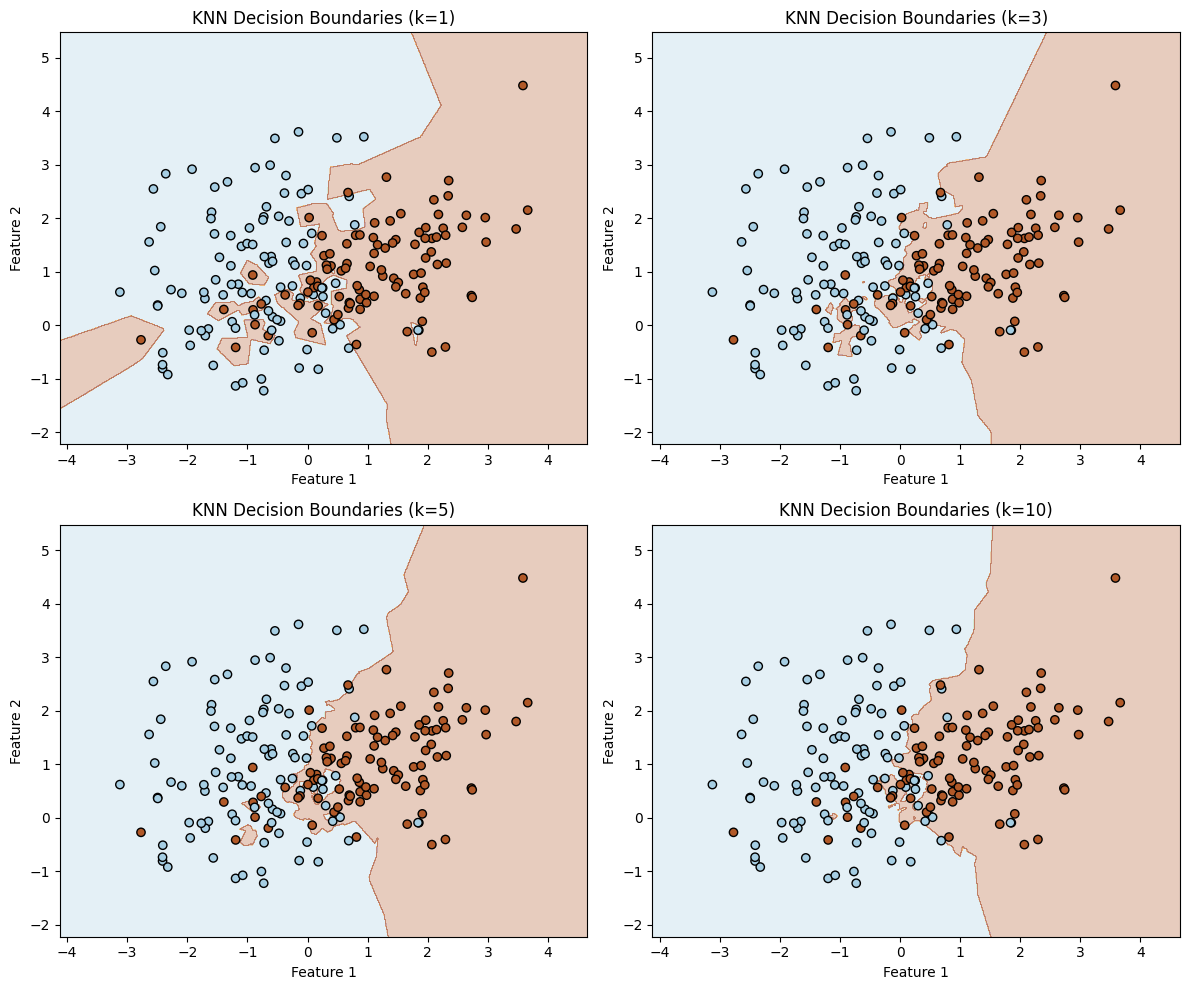

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
k_values = [1, 3, 5, 10]

for ax, k in zip(axs.flat, k_values):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k',
               cmap=plt.cm.Paired, marker='o')
    ax.set_title(f'KNN Decision Boundaries (k={k})')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# K-nearest neighbor algorithm using Sklearn 

K-Nearest Neighbors (KNN) works by identifying the 'k' nearest data points called as neighbors to a given input and predicting its class or value based on the majority class or the average of its neighbors. In this article we will implement it using Python's Scikit-Learn library.

### 1. Generating and Visualizing the 2D Data

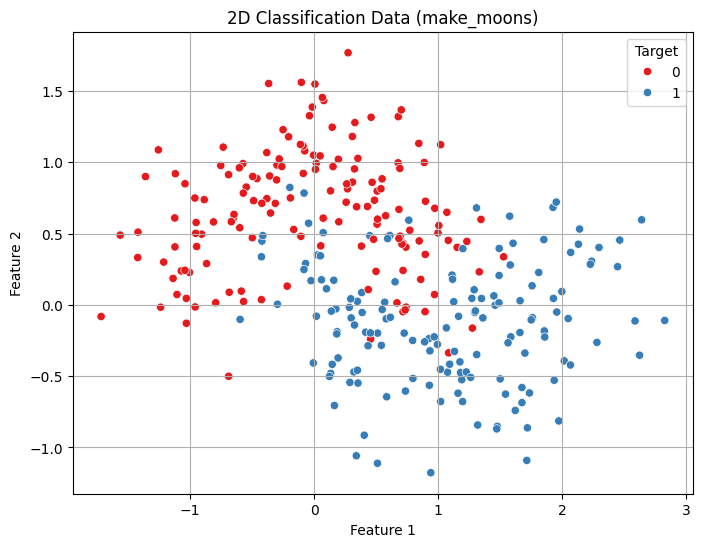

In [4]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create synthetic 2D data
X, y = make_moons(n_samples=300, noise=0.3, random_state=42)

# Create a DataFrame for plotting
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df['Target'] = y

# Visualize the 2D data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Feature 1", y="Feature 2", hue="Target", palette="Set1")
plt.title("2D Classification Data (make_moons)")
plt.grid(True)
plt.show()

#### 2. Train-Test Split and Normalization


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

### 3. Fit the k-NN Model and Evaluate

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train a k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
print(f"Test Accuracy (k=5): {accuracy_score(y_test, y_pred):.2f}")

Test Accuracy (k=5): 0.87


### 4. Cross-Validation to Choose Best k

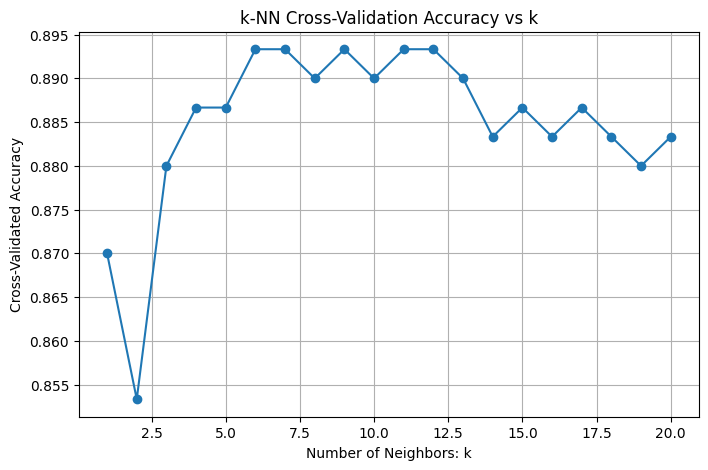

Best k from cross-validation: 6


In [7]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Range of k values to try
k_range = range(1, 21)
cv_scores = []

# Evaluate each k using 5-fold cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

### 5. Training with Best k

### 

In [8]:
# Train final model with best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Predict on test data
y_pred = best_knn.predict(X_test)

### 6. Evaluate Using More Metrics

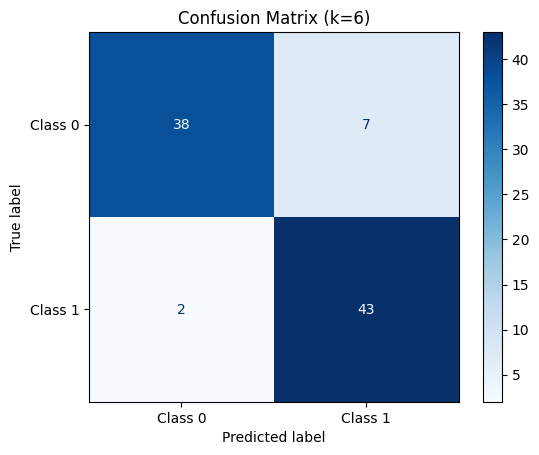

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.84      0.89        45
     Class 1       0.86      0.96      0.91        45

    accuracy                           0.90        90
   macro avg       0.91      0.90      0.90        90
weighted avg       0.91      0.90      0.90        90



In [9]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (k={best_k})")
plt.grid(False)
plt.show()

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

### 7. Visualize Decision Boundary with Best k

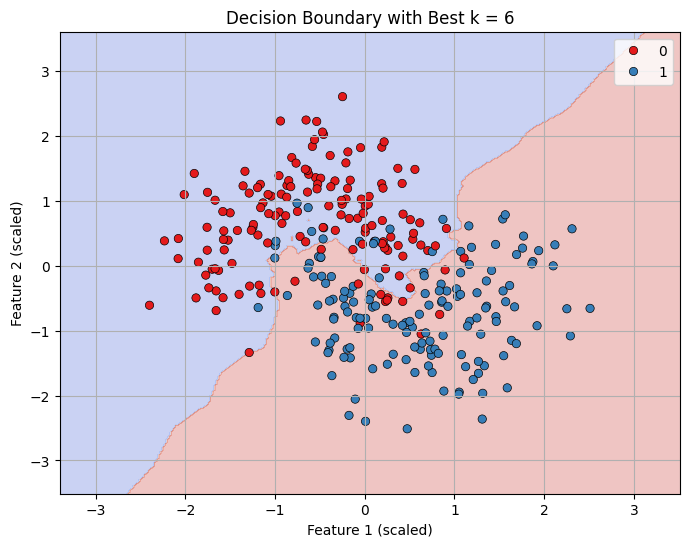

In [10]:
# Create mesh grid
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)
# Predict on mesh grid with best k
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette="Set1", edgecolor='k')
plt.title(f"Decision Boundary with Best k = {best_k}")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.grid(True)
plt.show()

We can see that our KNN model is working fine in classifying datapoints.